K-MEDIAS

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [48]:
local_path = "/workspaces/Tutorial_K-Medias_Santi_Izquierdo/data/raw/internal-link (7).csv"

if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    print(f"Cargado desde fichero local: {local_path}")
else:
    try:
        print("Fichero local no encontrado. Intentando descargar desde la URL de fallback...")
        df = pd.read_csv(fallback_url)
        print("Cargado desde URL.")
    except Exception as e:
        raise FileNotFoundError(f"No se encontró el fichero local y la descarga falló: {e}")

print("\nPrimeras filas:")
display(df.head())
print("\nColumnas del dataset:")
print(df.columns.tolist())


Cargado desde fichero local: /workspaces/Tutorial_K-Medias_Santi_Izquierdo/data/raw/internal-link (7).csv

Primeras filas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Columnas del dataset:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [49]:
local_path = "/workspaces/Tutorial_K-Medias_Santi_Izquierdo/data/raw/internal-link (7).csv"


print("\nPrimeras filas:")
display(df.head())
print("\nColumnas del dataset:")
print(df.columns.tolist())



Primeras filas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Columnas del dataset:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [50]:
cols_required = ["Latitude", "Longitude", "MedInc"]

missing = [c for c in cols_required if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas requeridas en el CSV: {missing}. Columnas disponibles: {df.columns.tolist()}")

data = df[cols_required].copy()

data = data.dropna().reset_index(drop=True)

print("Número de filas tras limpieza:", len(data))
display(data.head())


Número de filas tras limpieza: 20640


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [51]:
X = data[cols_required]  # features que usaremos (mismas 3 columnas)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("Tamaños: train =", X_train.shape, ", test =", X_test.shape)


Tamaños: train = (16512, 3) , test = (4128, 3)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [53]:
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_scaled)

X_train_plot = X_train.copy().reset_index(drop=True)
X_test_plot = X_test.copy().reset_index(drop=True)

X_train_plot['cluster'] = pd.Categorical(train_clusters.astype(int))
X_test_plot['cluster']  = pd.Categorical(test_clusters.astype(int))

print("Clusters asignados (train):")
print(pd.Series(train_clusters).value_counts())

print("Clusters asignados (test):")
print(pd.Series(test_clusters).value_counts())


Clusters asignados (train):
5    5188
3    3931
1    3380
4    2239
0    1321
2     453
Name: count, dtype: int64
Clusters asignados (test):
5    1374
3     962
1     829
4     514
0     337
2     112
Name: count, dtype: int64


/tmp/ipykernel_6365/2886573283.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_clusters)


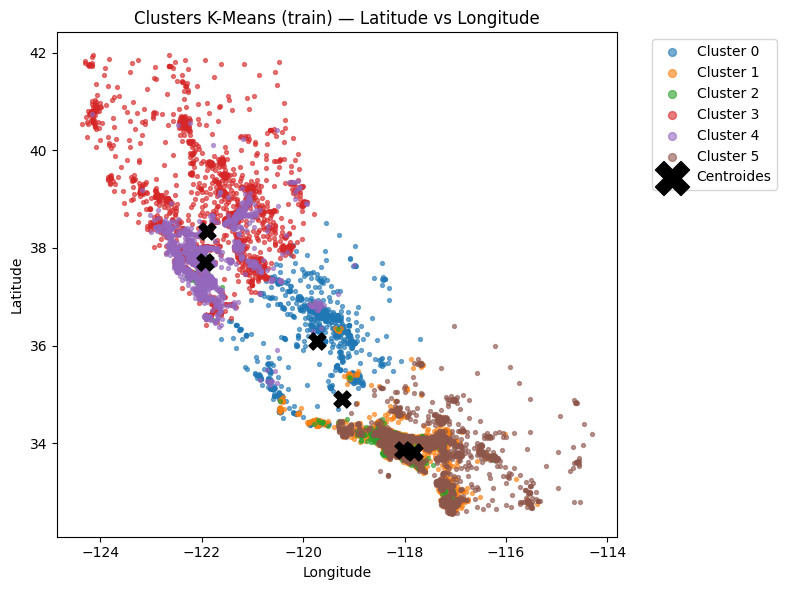

In [54]:
plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap("tab10", n_clusters)

for c in range(n_clusters):
    subset = X_train_plot[X_train_plot['cluster'] == c]
    plt.scatter(subset['Longitude'], subset['Latitude'], s=8, label=f"Cluster {c}", alpha=0.6)

centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)
plt.scatter(centers_orig[:,1], centers_orig[:,0], s=150, c='black', marker='X', label='Centroides')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters K-Means (train) — Latitude vs Longitude")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


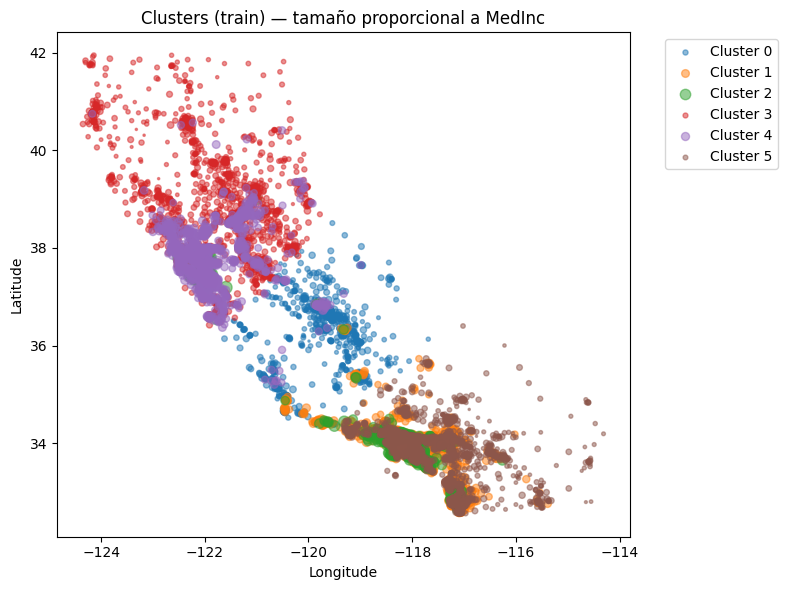

In [55]:
plt.figure(figsize=(8,6))

for c in range(n_clusters):
    subset = X_train_plot[X_train_plot['cluster'] == c]
    plt.scatter(subset['Longitude'], subset['Latitude'], s=(subset['MedInc']*5), alpha=0.5, label=f"Cluster {c}")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters (train) — tamaño proporcional a MedInc")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


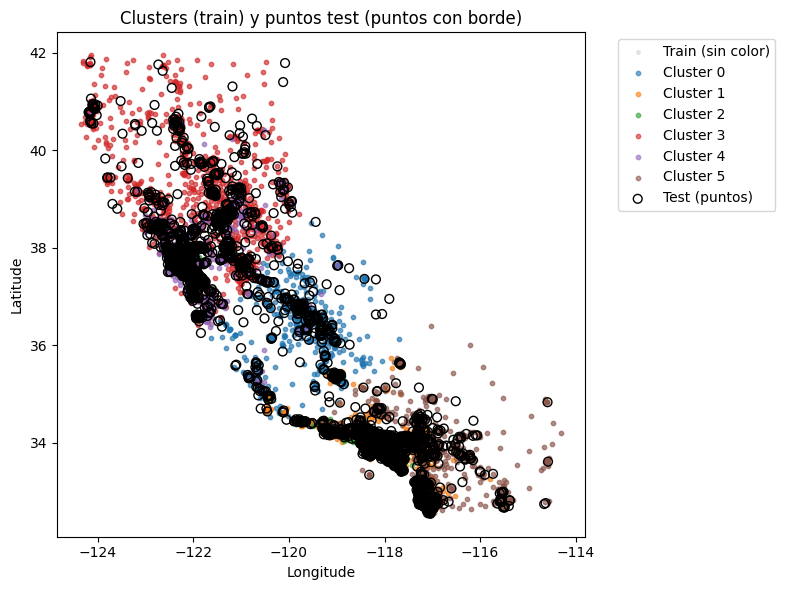

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], s=7, color='lightgray', alpha=0.5, label='Train (sin color)')
for c in range(n_clusters):
    subset = X_train_plot[X_train_plot['cluster']==c]
    plt.scatter(subset['Longitude'], subset['Latitude'], s=10, alpha=0.6, label=f"Cluster {c}")
plt.scatter(X_test['Longitude'], X_test['Latitude'], s=40, facecolors='none', edgecolors='k', label='Test (puntos)')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters (train) y puntos test (puntos con borde)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [57]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, train_clusters)
clf_pred_test = clf.predict(X_test_scaled)
print("Accuracy del clasificador frente a etiquetas KMeans (test):", accuracy_score(test_clusters, clf_pred_test))
print("\nMatriz de confusión (clasificador vs KMeans labels en test):\n", confusion_matrix(test_clusters, clf_pred_test))
print("\nClassification report:\n", classification_report(test_clusters, clf_pred_test, zero_division=0))


Accuracy del clasificador frente a etiquetas KMeans (test): 0.9951550387596899

Matriz de confusión (clasificador vs KMeans labels en test):
 [[ 332    1    0    3    1    0]
 [   1  826    0    0    0    2]
 [   0    2  110    0    0    0]
 [   1    0    0  955    6    0]
 [   0    0    0    2  512    0]
 [   0    1    0    0    0 1373]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       1.00      1.00      1.00       829
           2       1.00      0.98      0.99       112
           3       0.99      0.99      0.99       962
           4       0.99      1.00      0.99       514
           5       1.00      1.00      1.00      1374

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [58]:
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

joblib.dump(kmeans, os.path.join(models_dir, "kmeans_model.joblib"))
joblib.dump(scaler, os.path.join(models_dir, "scaler.joblib"))
joblib.dump(clf, os.path.join(models_dir, "rf_classifier.joblib"))

print("Modelos guardados en:", models_dir)


Modelos guardados en: models


In [59]:
new_point = [37.7, -122.4, 4.5]
new_point_df = pd.DataFrame([new_point], columns=["Latitude", "Longitude", "MedInc"])
new_point_scaled = scaler.transform(new_point_df)
pred_cluster_kmeans = int(kmeans.predict(new_point_scaled)[0])
pred_cluster_rf = int(clf.predict(new_point_scaled)[0])

print("Nuevo punto:", new_point)
print("Cluster KMeans:", pred_cluster_kmeans)
print("Cluster RF (clasificador):", pred_cluster_rf)


Nuevo punto: [37.7, -122.4, 4.5]
Cluster KMeans: 4
Cluster RF (clasificador): 4
